# Constructing a Neural Network

## A simple neural network


Neural networks have emerged in recent years as extremely useful tools in a variety of applications. One area where they have produced particularly impressive results is in image recognition. Recently Python packages have been developed with extensive support for creating neural networks. However, this functionality obscures the details of what a neural network is. In order to understand how neural networks really work, we will explore a very simple network which can be used for recognising handwriting (in particular digits in the range 0-9).

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
nndata = np.load("NN.npz")

In [17]:
W = nndata["Weight"]
b = nndata["Bias"]
x = nndata["x"]

In [18]:
(W.shape, b.shape, x.shape)

((10, 784), (10,), (784,))

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [73]:
def plot_digit(digit):  
    # A function to plot a vector of length 784 as a 28 x 28 image
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image, cmap = plt.get_cmap('gray'))
    plt.axis("off")

We  recall the standard rules of matrix-vector arithmetic. Start with two matrices $A$ of size $m_1 \times n_1$ and $B$ of size $m_2 \times n_2$. We can obtain the product $AB$ of size $m_2 \times n_2$ provided $n_1 = m_2$, and we can compute the product $BA$ of size $m_2 \times n_1$ provided $n_2 = m_1$. We can also compute the sum $A+B$ of size $n \times m$ provided $n_1 = n_2 =n$ and $m_1 = m_2 = m$. We can therefore multiply our vector $x$ on the right of the matrix $W$ provided $W$ has size $n \times 784$. This is the case for our example matrix $W$ which happens to have $n=1$. The product $W x$ is then of size $10 \times 1$. We can add to this a vector that is also of size $10 \times 1$. This is the vector $b$.

Now, let us compute W x + b. In doing so, it would be convenient to rescale the components of the resulting vector to be in the range 0-1. One way to achieve this using the logistic sigmoid function

In [21]:
sigmoid(W@x + b)

array([4.26747535e-06, 6.20727103e-11, 1.32466819e-06, 6.14775232e-01,
       5.50254761e-11, 8.38045940e-01, 5.21637046e-07, 2.24692010e-05,
       4.38475614e-08, 5.16372358e-08])

What do you notice about the output of your network? Interestingly, almost all of the numbers are very small, except for the 3rd and 5th elements (counting from zero), with the 5th element being largest. Consider the vector $x$ as an image and plot it. Is it a coincidence that the image represents a handwritten number 5? No, in fact this is one of the simplest examples of a neural network!

In [22]:
np.argmax(sigmoid(W2@sigmoid(W1@x + b1) + b2))

5

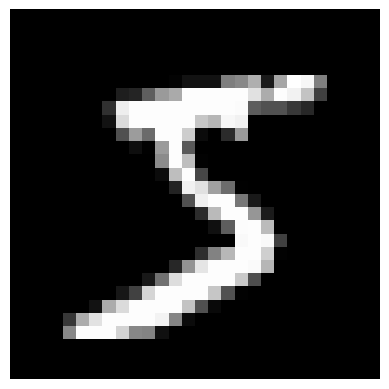

In [74]:
plot_digit(x)

All of the magic is in the weight matrix $W$ and the bias vector $b$. The particular choice of $7850$ numbers in W and b efficiently capture how a human writes numbers. Exactly how these were produced is beyond the scope of this exercise, but a simple explanation is that they were obtained by training the neural network with a large corpus of $50,000$ example handwritten digits. In fact, we already saw this training data earlier in the module.

In the terminology of neural networks:
- $x$ is called the *input layer*,
- the elements of $x$ are called *input neurons*,
- $y$ is called the *output layer*,
- the elements of $y$ are called *output neurons*,
- the elements of the matrix $W$ are called *weights*,
- $b$ is called the *bias*
- $\sigma$ is called an *activation function*, and

The whole network, in which output from one layer is used as input to the next is called a feed forward neural network.

## Hidden layers


The previous example was an example of a single-layer neural network. It performs reasonably well, but we can do much better by using a more sophisticated neural network. One way we can do this is by introducing a hidden layer, which is just an intermediate step in our matrix-vector multiplication. We now define two weight matrices $W_1$ (of size $30 \times 784$) and $W_2$ (of size $10 \times 30$) and two bias vectors $b_1$ (size $30 \times 1$) and $b_2$ (size $10 x 1$).


Let's use this to construct a network with an additional hidden layer. The weights and biases for each layer are also taken from `NN.npz`. Again, use a logistic sigmoid activation function for both layers.

In [9]:
W1 = nndata["Weight1"]
b1 = nndata["Bias1"]
W2 = nndata["Weight2"]
b2 = nndata["Bias2"]

In [10]:
(W1.shape, b1.shape, W2.shape, b2.shape)

((30, 784), (30,), (10, 30), (10,))

We can now first multiply $W_2$ by $x$, add $b_1$, and rescale using the logistic sigmoid. This produces an intermediate vector (hidden layer) $x_1$ of size $30 \times 1$:

In [24]:
sigmoid(W1@x + b1)

array([1.00000000e+00, 7.50426140e-23, 9.99979061e-01, 5.32546610e-01,
       3.54926885e-08, 6.88606572e-15, 9.99993922e-01, 2.62713557e-06,
       2.89201341e-10, 1.27849176e-10, 9.99999962e-01, 2.64374714e-01,
       1.00000000e+00, 2.05641276e-04, 9.99999966e-01, 5.43531031e-01,
       1.92426771e-11, 2.28602297e-24, 1.22619026e-01, 1.12848848e-02,
       9.99999536e-01, 9.95806810e-01, 1.00000000e+00, 6.30303457e-01,
       9.96673999e-01, 9.99999075e-01, 1.25886806e-09, 9.99999978e-01,
       5.17941551e-08, 3.83658766e-06])

We can the repeat the process with our other matrix and vector, multiplying $W_2$ by $x_1$, adding $b_2$ and rescaling again:

In [25]:
sigmoid(W2@sigmoid(W1@x + b1) + b2)

array([5.68226768e-08, 1.61977706e-05, 4.63367081e-05, 3.74157277e-02,
       4.18310970e-14, 9.99806635e-01, 3.40621490e-12, 2.12025245e-06,
       2.63007639e-10, 3.21012149e-09])

In [13]:
np.argmax(sigmoid(W2@sigmoid(W1@x + b1) + b2))

5

Now this appears to perform much better than the single layer network. The matrices $W_1$ and $W_2$ and biases $b_1$ and $b_2$ were computed using a very similar training process as in the single layer case.

## Deep Networks

We could continue adding layers of sophistication to our network in order to improve accuracy. In fact, many other more sophisticated deep neural network with several more layers have been developed for solving our exact problem. See [here](https://yann.lecun.com/exdb/mnist/) for further details and [this paper](https://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) describing the original neural network model developed for this purpose.

The particular choice of how many layers to include, what sizes the weight matrices should be, etc., are called *hyperparameters* and are chosen to suit the problem. Many modern neural network tools include the tuning of these hyperparameters as part of the step of training the network.

## Understanding what a neural network sees

So far, we have just treated our neural network as a black box, a function that takes an input (an image of a digit) and produces an output (a number between 0 and 9). We will now try to explore inside the box and understand how the neural network works.

### Solving for $x$

Our simple neural network is essentially just finding the $y$ such that $y=\sigma(W.x+b)$. It is tempting to try turning this around and ask which value of $x$ a given $y$  corresponds to. This amounts to solving the matrix equation $W.x=\sigma^{-1}(y)-b$ for $x$. We've seen how to do this using $LU$ decomposition. Let's now try this for $y$ corresponding to the digit five (i.e. the fifth entry should be close to $1$ and the others close to $0$).

In [28]:
def sigma_inv(sigma):
    return np.log(sigma/(1-sigma))

In [78]:
y = np.array([1-10**-10, 10**-10, 10**-10, 10**-10, 10**-10, 10**-10, 10**-10, 10**-10, 10**-10, 10**-10])

In [79]:
xsol = np.linalg.lstsq(W, sigma_inv(y) - b, rcond=None)[0]

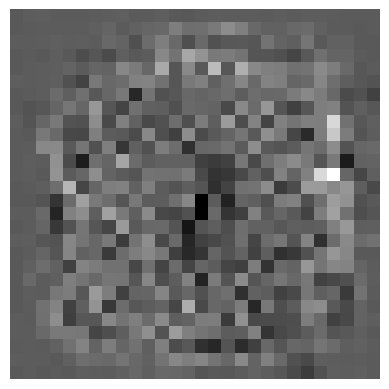

In [80]:
plot_digit(xsol)

This doesn't look much like the number zero. What has happened? To understand, let's go back to our original input $x$ with output $y$ and compare it to the corresponding $x$ obtained by solving for $y$:

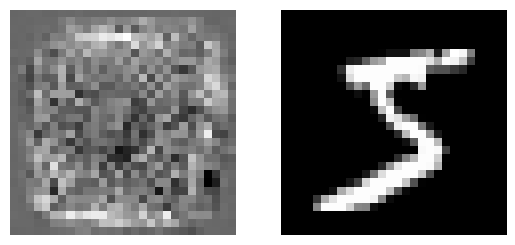

In [81]:
y = sigmoid(W@x + b)
xsol = np.linalg.lstsq(W, sigma_inv(y) - b, rcond=None)[0]
plt.figure()
plt.subplot(1,2,1)
plot_digit(xsol)
plt.subplot(1,2,2)
plot_digit(x)

These don't look at all alike either. The problem is that we have a function that takes $784$ ($=28\times28$ pixel image) inputs and returns $10$ outputs (one per digit). It is not a $1-1$ (injective) function. Equivalently, since $W$ is not a square matrix it does not have an inverse - it is underdetermined. Our solution was just one of infinitely-many solutions.

### Visualising a neural network layer

The previous example might suggest that it is hopeless to try to make sense of how our neural network works. There is however, a different way we can try to analyse it. Notice that our matrix $W$ has dimensions $10 \times 784$. We can equivalently interpret this as $10$ vectors of size $1 \times 784$, or even $10$ matrices of size $28 \times 28$. If we now plot each of those $10$ matrices, we notice something interesting: if we look carefully we notice that they appear to be slightly fuzzy versions of the digits $0$ to $9$!

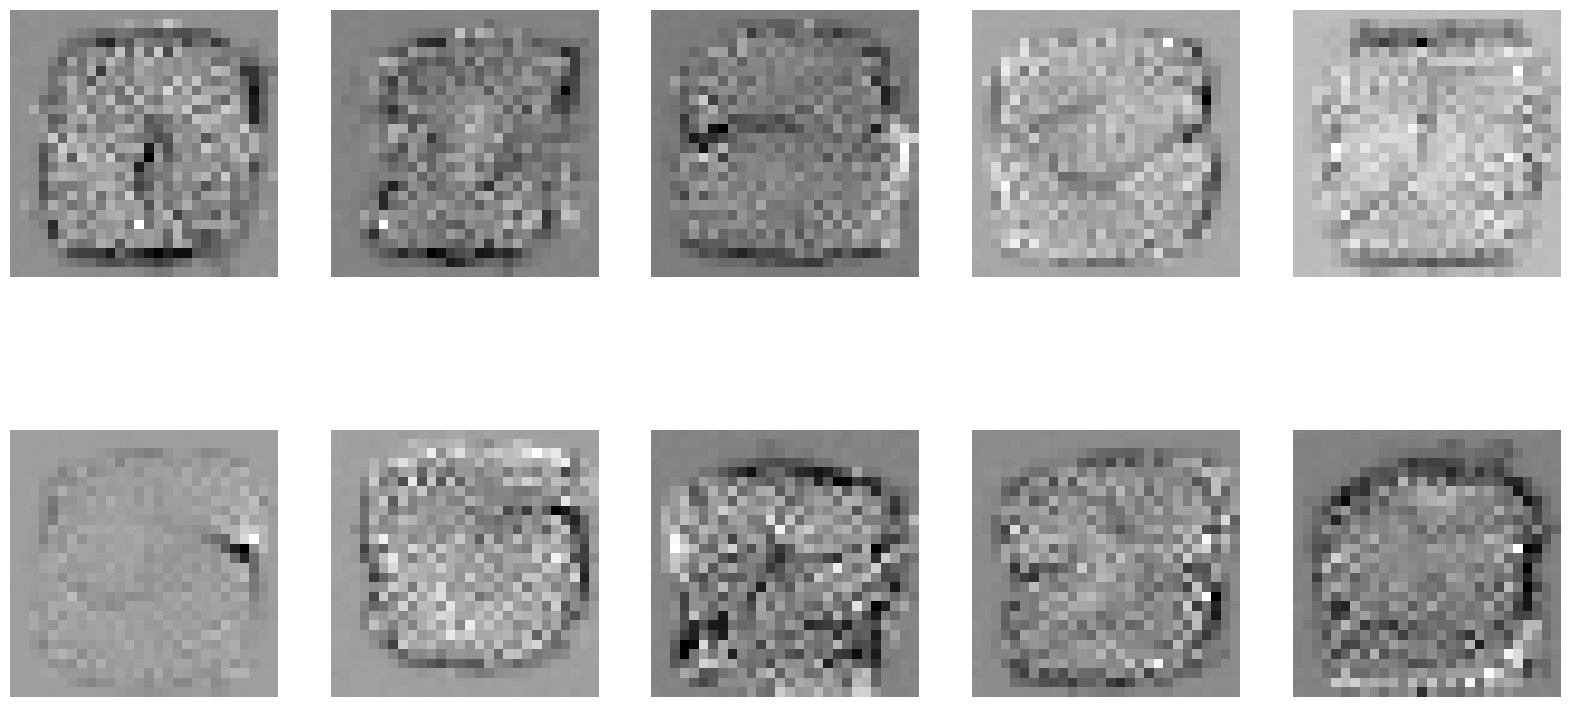

In [85]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,1+i)
    plot_digit(W[i])
plt.show()

### Visualising the two-layer network

We can similarly try to visualise our two-layer network. Recall that this consisted of two matrices: $W_1$ of size $30 \times 784$ and $W_2$ of size $10 \times 30$. Taking $W_1$ first, we can split this into $30$ images. In doing so, we see that each image is capturing a feature such as a vertical or horizontal line. 

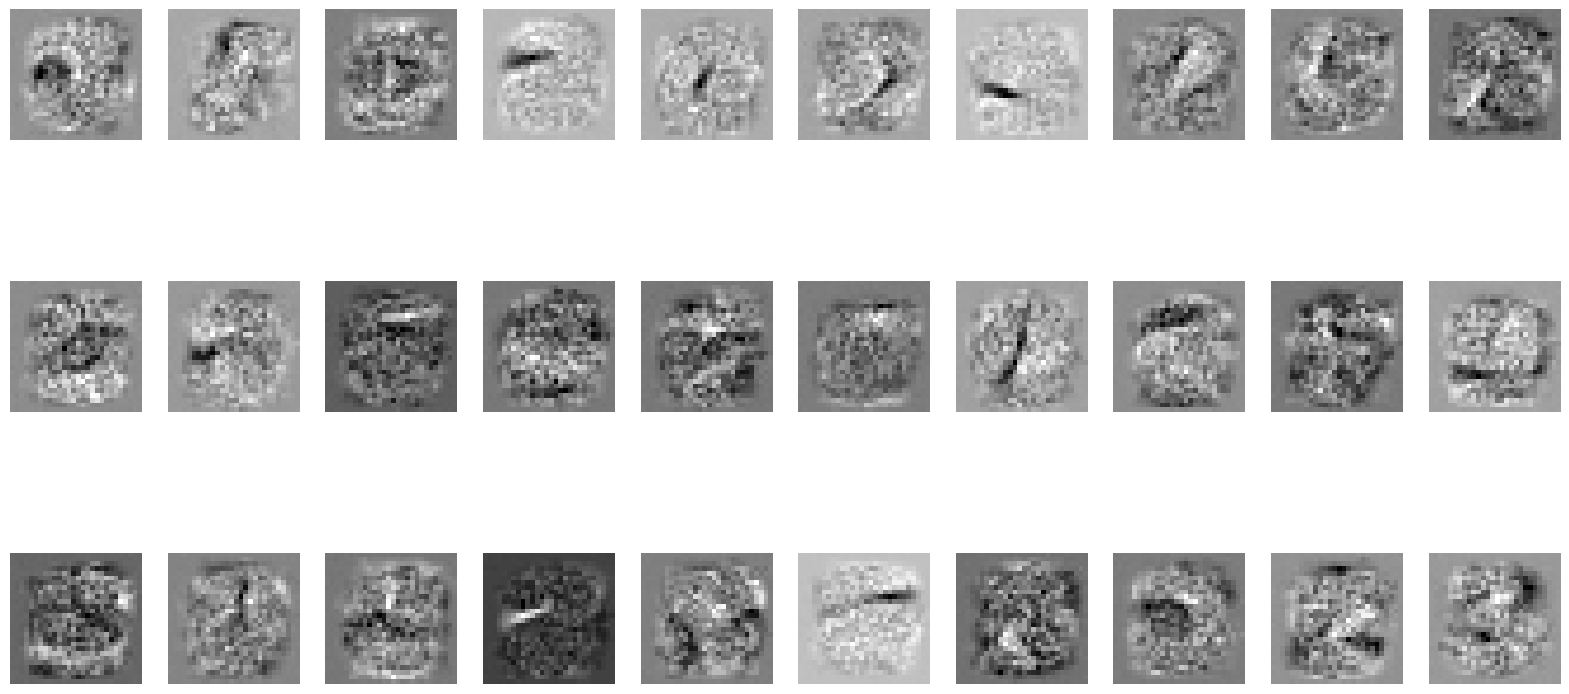

In [87]:
plt.figure(figsize=(20,10))
for i in range(30):
    plt.subplot(3,10,1+i)
    plot_digit(W1[i])
plt.show()

We might then interpret $W_2$ as capturing how these features are combined to produce a digit.